### Choose 1 file

In [1]:
import os
fn_asm = os.listdir('./data')

print('Students list:')
for i in range(len(fn_asm)):
    print(f'Number: {i+1} - {fn_asm[i][:-4]}')

std_index = int(input('\nChoose 1 student to view all answer, input 1 number: ')) - 1

print(f'\nStudent number {std_index + 1} record: {fn_asm[std_index][:-4]}')

fn = fn_asm[std_index]

Students list:
Number: 1 - 2000111_NguyenVanAn_3B
Number: 2 - 2000112_LePhanBinh_3B
Number: 3 - 2000113_TranDan_3B
Number: 4 - 2000114_PhanNhanHy_3B
Number: 5 - 2000115_VoMinh_3B
Number: 6 - 2000116_TrinhNgoMai_3B
Number: 7 - 2000117_DinhThiHao_3B
Number: 8 - 2000118_TranHao_3B
Number: 9 - 2000119_LeDinhKhai_3B
Number: 10 - 2000120_NgoVanLinh_3B
Number: 11 - 2000121_NguyenNhan_3A
Number: 12 - 2000122_TranQuynh_3A
Number: 13 - 2000123_VinhHao_3A
Number: 14 - 2000124_DiepTan_3A
Number: 15 - 2000125_HoKhoa_3A
Number: 16 - 2000126_HoTrung_3A
Number: 17 - 2000127_PhamHuy_3A
Number: 18 - 2000128_PhuocNguyen_3A
Number: 19 - 2000129_NguyenNgoc_3A
Number: 20 - 2000130_MinhNhan_3A

Choose 1 student to view all answer, input 1 number: 17

Student number 17 record: 2000127_PhamHuy_3A


### Read image

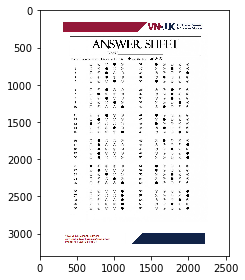

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import numpy as np

path = './data/' + fn
image = imread(path)

imshow(image)

### Function to get choices of every 5 lines

In [3]:
def get_5choices(box5):
    global all_answers
    box5 = cv2.cvtColor(box5, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(box5, 0, 255, cv2.THRESH_BINARY_INV)
    cnts, hierarychy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    choices = []

    for cnt in cnts:
        area = cv2.contourArea(cnt)
        if area > 100:
            center = np.round(np.mean(cnt, axis=0)[0]).astype(int)
            choices.append(center)

    choices.sort(key=lambda x:x[1])
    
    for choice in choices:
        x = choice[0]
        if 200 < x < 300:
            all_answers.append('A')
        elif 300 < x < 400:
            all_answers.append('B')
        elif 400 < x < 500:
            all_answers.append('C')
        elif 500 < x < 600:
            all_answers.append('D')
        elif 600 < x < 700:
            all_answers.append('E')

### Main: loop over all boxes that contain 5 lines to save choices into lists

In [4]:
crop = image[690:2800, 430:2100]
height = 300
width = 740
step_ver = 40
step_hor = 140

# fig = plt.figure(figsize=(50, 100))
start_hor = 0
index = 0
all_answers = []

for col in range(2):
    start_ver = 0
    for row in range(6):
        index += 1
#         fig.add_subplot(6, 2, index)
#         imshow(crop[start_ver:start_ver + height, start_hor:start_hor + width])
        get_5choices(crop[start_ver:start_ver + height, start_hor:start_hor + width])
        start_ver = start_ver + height + step_ver
    start_hor = start_hor + width + step_hor

### Display the student's choices

In [5]:
import pandas as pd

pd.set_option('display.max_rows', None)
std_anss = pd.DataFrame(index = range(1, 61), columns = ['Choice'])
std_anss['Choice'] = all_answers

std_anss

,Choice
1,D
2,C
3,C
4,C
5,D
6,C
7,B
8,C
9,D
10,E
